### Sentiment Analysis on Amazon Customer Reviews Using NLP


### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

#sklearn
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

#File system mangement
import os

#suppress warnings
import warnings
warnings.filterwarnings('ignore')


### Reading the Datasets

In [5]:
data = pd.read_csv("C:/Users/ragin/Downloads/amazon_reviews.csv")

In [6]:
data.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


### Basic Exploratory Data Analysis(EDA)

In [8]:
data.shape

(2782, 5)

In [9]:
#missing values 
data.isnull().sum()

asin      0
name      0
date      0
rating    0
review    6
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    2776 non-null   object
 1   name    2776 non-null   object
 2   date    2776 non-null   object
 3   rating  2776 non-null   int64 
 4   review  2776 non-null   object
dtypes: int64(1), object(4)
memory usage: 130.1+ KB


### Exploring the Target Column

<Axes: ylabel='count'>

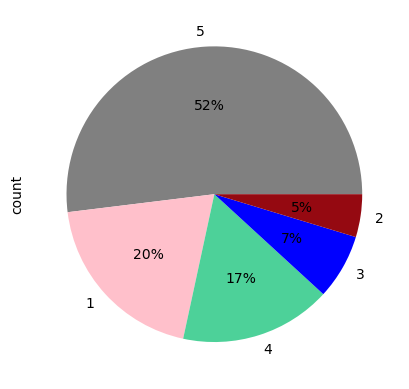

In [14]:
data.rating.value_counts().plot(kind ='pie', autopct = '%1.0f%%', colors = ['grey','pink','#4dd199','blue','#950911'])

<Axes: xlabel='rating', ylabel='count'>

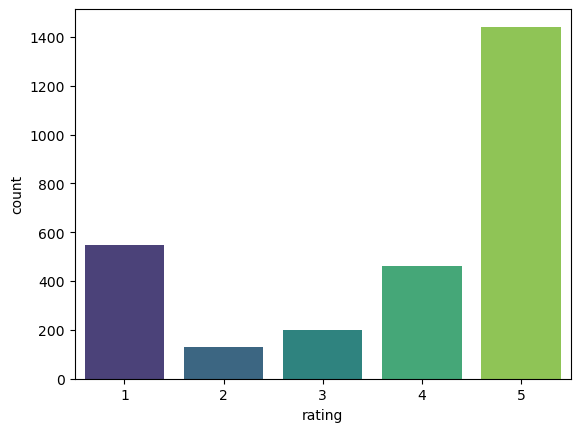

In [15]:
sns.barplot(x = data['rating'].value_counts().index,y = data['rating'].value_counts(),palette = 'viridis')

### Explore the columns

In [17]:
features = "review"
label = "rating"

x = data[features]
y = data[label]

### DIVIDE TRAINING AND TESTING SETS

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
                                                

In [20]:
train_data = pd.DataFrame({features : x_train, label : y_train})
test_data = pd.DataFrame({features : x_test , label : y_test})

In [21]:
print('train data:', train_data.shape)
print('test data:',test_data.shape)

train data: (1943, 2)
test data: (833, 2)


### TFIDF [Term Frequency Inverse Document Frequency] FEATURES 

In [23]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)


### BUILDING A TEXT CLASSIFICATION MODE

## Random Forest Classifier Model

In [26]:
# Initialize RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200)

In [27]:
# Fit the model
text_classifier.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
# Make predictions
y_pred = text_classifier.predict(x_test_tfidf)

In [29]:
# Evaluate model
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9063625450180072


In [30]:
from sklearn.metrics import classification_report

# Print the classification report (precision, recall, F1-score for each class)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.94      0.88      0.91       155
           2       1.00      0.88      0.93        32
           3       0.96      0.77      0.85        56
           4       0.97      0.73      0.83       153
           5       0.87      1.00      0.93       437

    accuracy                           0.91       833
   macro avg       0.95      0.85      0.89       833
weighted avg       0.91      0.91      0.90       833



### Logistic Regression Model

In [32]:
text_classifier_1 = LogisticRegression()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_tfidf_1 = vectorizer.fit_transform(x_train)
x_test_tfidf_1 = vectorizer.transform(x_test)



In [34]:
text_classifier_1.fit(x_train_tfidf_1, y_train)

LogisticRegression()

In [35]:
y_pred = text_classifier_1.predict(x_test_tfidf_1)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7551020408163265


In [37]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.86      0.80      0.83       155
           2       1.00      0.25      0.40        32
           3       0.56      0.16      0.25        56
           4       0.92      0.35      0.51       153
           5       0.72      0.99      0.83       437

    accuracy                           0.76       833
   macro avg       0.81      0.51      0.56       833
weighted avg       0.78      0.76      0.72       833



### NAVIES BAYES CLASSIFIER
### MultiNomial NB Model

In [39]:
vectorizer = TfidfVectorizer()
x_train_tfidf_2 = vectorizer.fit_transform(x_train)
x_test_tfidf_2 = vectorizer.transform(x_test)

In [40]:
text_classifier_2 = MultinomialNB()

In [41]:
text_classifier_2.fit(x_train_tfidf_2, y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import confusion_matrix
y_pred = text_classifier_2.predict(x_test_tfidf_2)
print(confusion_matrix(y_test,y_pred))


[[ 52   0   0   0 103]
 [  4   0   0   0  28]
 [  0   0   0   1  55]
 [  1   0   0   4 148]
 [  0   0   0   0 437]]


In [43]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.5918367346938775


In [44]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.91      0.34      0.49       155
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        56
           4       0.80      0.03      0.05       153
           5       0.57      1.00      0.72       437

    accuracy                           0.59       833
   macro avg       0.46      0.27      0.25       833
weighted avg       0.61      0.59      0.48       833



### Support Vector Machines (SVM) Model

In [46]:
from sklearn.svm import SVC

In [47]:
vectorizer =  TfidfVectorizer()
x_train_tfidf_3 = vectorizer.fit_transform(x_train)
x_test_tfidf_3 = vectorizer.transform(x_test)

In [48]:
svm_model = SVC(kernel='rbf')


In [49]:
svm_model.fit(x_train_tfidf_3, y_train)

SVC()

In [50]:
y_pred = svm_model.predict(x_test_tfidf_3)
print(confusion_matrix(y_test,y_pred))

[[139   0   0   0  16]
 [  2  26   0   0   4]
 [  0   0  39   0  17]
 [  2   0   2 107  42]
 [  0   0   0   0 437]]


In [51]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.8979591836734694


In [52]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.97      0.90      0.93       155
           2       1.00      0.81      0.90        32
           3       0.95      0.70      0.80        56
           4       1.00      0.70      0.82       153
           5       0.85      1.00      0.92       437

    accuracy                           0.90       833
   macro avg       0.95      0.82      0.87       833
weighted avg       0.91      0.90      0.89       833



## Final Report
Better accuracy results are achieved with Random Forest Classifier and Support Vector Machines (SVC), both ranging are near as 90%"

### Train the Data and Perform Sentiment Analysis of Text

In [55]:
text_data = train_data[train_data['rating']==1]['review']
text_data.values[1]

'Received damaged product. The case is scratched in multiple places and all the parts are loose. Looks like  a duplicate box with iron is painted and set up with godrej tag and sent to us. Highly dissatisfied with the product quality'

In [56]:
text_data = train_data[train_data['rating']==4]['review']
text_data.values[1]

'Not that great smell like mysore sandal soap'

### Exploring The Keyword Name column

<Axes: xlabel='count', ylabel='name'>

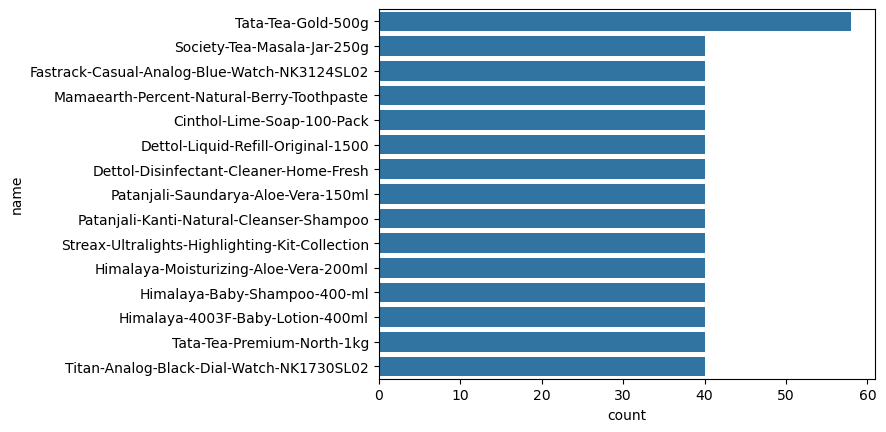

In [58]:
# Exploring keyword column

sns.barplot(y = data['name'].value_counts()[:15].index,
            x= data['name'].value_counts()[:15], orient = 'h')

In [59]:
train_data.loc[train_data['review'].str.contains('5',na=False, case=False)].rating.value_counts()

rating
5    118
1     52
4     30
3     27
2     11
Name: count, dtype: int64

In [60]:
# A glance over the existing data

train_data['review'][:5]

729                Useful energizer, mild orange flavour.
2153                    Strong tea. I prefer it this way.
2760    Agarbatti is excellent but its mrp is only Rs ...
84      Had tried this product majorly because of the ...
2073    Excellent product as its smell,taste and flavo...
Name: review, dtype: object

### Text Data PreProcessing

In [63]:
# Applying cleaning function to both train and test datasets
train_data['review'] = train_data['review'].apply(lambda x: clean_text(x))
test_data['review'] = test_data['review'].apply(lambda x: clean_text(x))


In [64]:
#lets take a look at the updated text
train_data['review'].head()

729                  useful energizer mild orange flavour
2153                      strong tea i prefer it this way
2760    agarbatti is excellent but its mrp is only rsp...
84      had tried this product majorly because of the ...
2073    excellent product as its smelltaste and flavou...
Name: review, dtype: object

### Repeated words in WordCloud Format

Text(0.5, 1.0, 'Repeated words of Reviews')

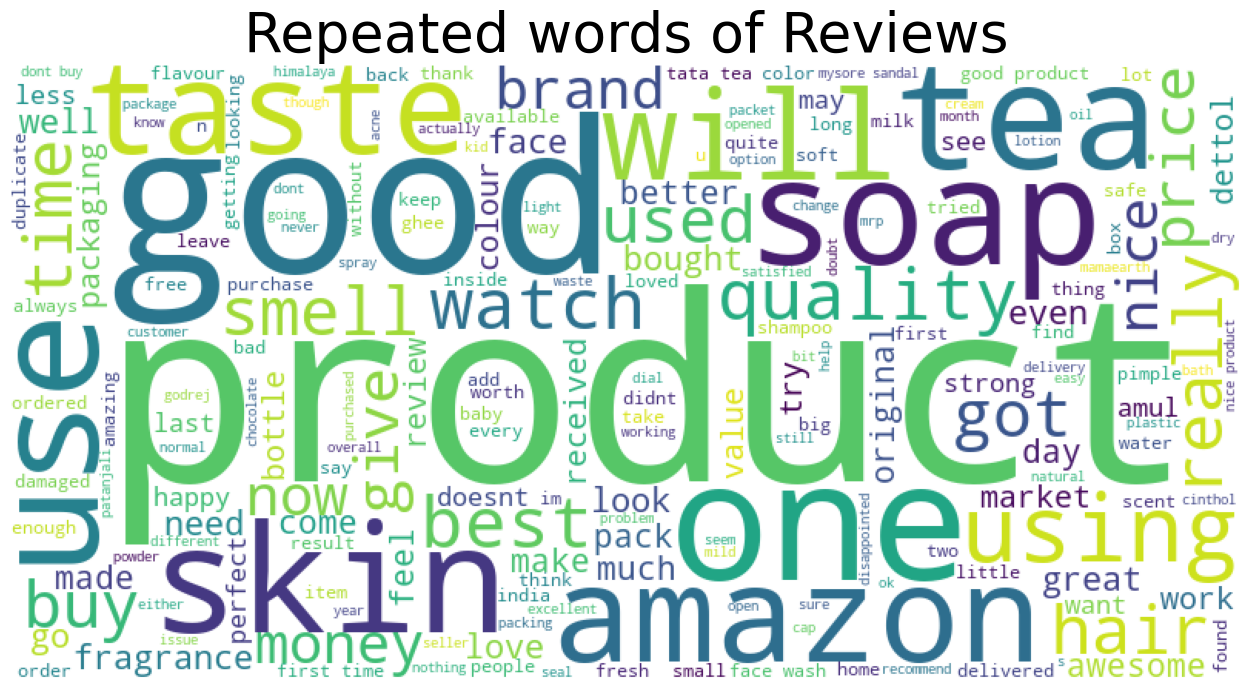

In [66]:
from wordcloud import WordCloud
fig, ax1 = plt.subplots(1, figsize=[20, 8])

#ax1==>disaster_tweets
wordcloud1 = WordCloud( background_color='white',
                        width=800,
                        height=400).generate(" ".join(train_data['review']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Repeated words of Reviews',fontsize=40)

### TOKENIZATION

In [68]:
from collections import Counter
word_counter = Counter(train_data['review'])

In [69]:
most_common_words = word_counter.most_common()[:10]
most_common_words

[('good', 44),
 ('nice', 14),
 ('good product', 9),
 ('ok', 7),
 ('tasty', 5),
 ('nice product', 5),
 ('i bought thismonths back but so called leather is loosing its colour plz dont buy these people are loosing in the name of brand',
  4),
 ('being a mom i am very peculiar about the cosmetics i use for my baby and i always try to use non chemical based cosmetics for my babyi have tried few so called big foreign brands before but results were below average and at last tried himalaya baby shampoo and the results were just astonishingall thr natural oil of my babies hairs were abck to normal hairs were were soft hardly any itching in eyesits a must buy products for all thr moms who love their babiesproduct',
  4),
 ('awesone smelldoesnt crumble up in water either👍', 4),
 ('i love this digital safe locker now i can put all my important stuff inside this box the good thing is that it is not that bulky the material is also very good seems very strong and heavy and it is very easy to install 

Text(0.5, 0, 'word rank')

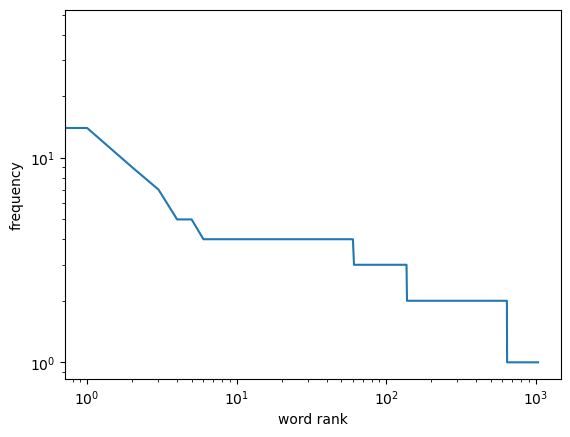

In [70]:
sorted_word_counts = sorted(list(word_counter.values()),reverse = True)
plt.loglog(sorted_word_counts)
plt.ylabel("frequency")
plt.xlabel("word rank")

In [71]:
# Example statement
text = "I got a parcel, but that's not mine!."
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print("Example Text:", text)
print("------------------------------------------------------------------------")
print("Tokenization by whitespace: ",tokenizer1.tokenize(text))
print()
print("Tokenization by words using Treebank word Tokenizer: ",tokenizer2.tokenize(text))
print()
print("Tokenization by Punctuation: ",tokenizer3.tokenize(text))
print()
print("Tokenization by regular expression: ",tokenizer4.tokenize(text))

Example Text: I got a parcel, but that's not mine!.
------------------------------------------------------------------------
Tokenization by whitespace:  ['I', 'got', 'a', 'parcel,', 'but', "that's", 'not', 'mine!.']

Tokenization by words using Treebank word Tokenizer:  ['I', 'got', 'a', 'parcel', ',', 'but', 'that', "'s", 'not', 'mine', '!', '.']

Tokenization by Punctuation:  ['I', 'got', 'a', 'parcel', ',', 'but', 'that', "'", 's', 'not', 'mine', '!.']

Tokenization by regular expression:  ['I', 'got', 'a', 'parcel', 'but', 'that', 's', 'not', 'mine']


### BAG OF WORDS

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(
    min_df=1, 
    max_df=0.7, 
    stop_words=stopwords.words('english')  # Use nltk's stopwords
)

# Fit and transform the text data into a document-term matrix
transformed = vectorizer.fit_transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()
# Print the transformed array
print(transformed)


[[0 1]
 [1 0]]


In [73]:
#Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_data['review'] = train_data['review'].apply(lambda x:tokenizer.tokenize(x))
test_data['review'] = test_data['review'].apply(lambda x:tokenizer.tokenize(x))


In [74]:
train_data['review'].head()

729            [useful, energizer, mild, orange, flavour]
2153              [strong, tea, i, prefer, it, this, way]
2760    [agarbatti, is, excellent, but, its, mrp, is, ...
84      [had, tried, this, product, majorly, because, ...
2073    [excellent, product, as, its, smelltaste, and,...
Name: review, dtype: object

### Stop Words Removal

In [76]:
def remove_stopwords(text):
    #remove stopwords belonging to english language
    words = [w for w in text if w not in stopwords.words('english')] 
    return words

train_data['review'] = train_data['review'].apply(lambda x: remove_stopwords(x))
test_data['review'] = test_data['review'].apply(lambda x: remove_stopwords(x))
    

### STEMMING AND LEMMATIZATION 

In [78]:
#Eample text
text = "The parcel arrived, but it is completely damaged."

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

#stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the Sentence: "," ".join(stemmer.stem(token) for token in tokens))

#lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
print("Lemmatizing the Sentence: "," ".join(lemmatizer.lemmatize(token) for token in tokens))

Stemming the Sentence:  the parcel arriv , but it is complet damag .
Lemmatizing the Sentence:  The parcel arrived , but it is completely damaged .


In [79]:
#after preprocessing , the text format

def combine_text(text):
    #takes a list of text and combines them into large chunk of text
    combined_text = ' '.join(text)
    return combined_text

train_data['review'] = train_data['review'].apply(lambda x: combine_text(x))
test_data['review'] = test_data['review'].apply(lambda x: combine_text(x))

In [80]:
train_data['review']

729                  useful energizer mild orange flavour
2153                                strong tea prefer way
2760    agarbatti excellent mrp rsper packetso dont go...
84      tried product majorly name ingredients first t...
2073    excellent product smelltaste flavour every cus...
                              ...                        
2729    product original used one got store bangalore ...
909     good tasty feel bournvita hyped due advertisement
928     spoilt perhaps stored transported harsh sunlig...
21      myyear old child doesnt cavity started develop...
1093    use gel night cream quite happy doesnt make be...
Name: review, Length: 1943, dtype: object

### ALL PREPROCESSING PART TOGETHER

In [82]:
#text precessing function
def text_processing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    no_punc = clean_text(text)
    tokenized_text = tokenizer.tokenize(no_punc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [84]:
train_data

,review,rating
729,useful energizer mild orange flavour,3
2153,strong tea prefer way,5
2760,agarbatti excellent mrp rsper packetso dont go...,5
84,tried product majorly name ingredients first t...,5
2073,excellent product smelltaste flavour every cus...,5
...,...,...
2729,product original used one got store bangalore ...,1
909,good tasty feel bournvita hyped due advertisement,5
928,spoilt perhaps stored transported harsh sunlig...,2
21,myyear old child doesnt cavity started develop...,1


### To predict sentiment analysis using the SentimentIntensityAnalyzer model."

In [86]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [87]:
train_data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in train_data['review']]
train_data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in train_data['review']]
train_data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in train_data['review']]
train_data['Compund'] = [sentiments.polarity_scores(i)['compound'] for i in train_data['review']]


In [88]:
train_data

,review,rating,Positive,Negative,Neutral,Compund
729,useful energizer mild orange flavour,3,0.667,0.000,0.333,0.7184
2153,strong tea prefer way,5,0.524,0.000,0.476,0.5106
2760,agarbatti excellent mrp rsper packetso dont go...,5,0.403,0.000,0.597,0.6597
84,tried product majorly name ingredients first t...,5,0.474,0.000,0.526,0.9875
2073,excellent product smelltaste flavour every cus...,5,0.326,0.131,0.543,0.7485
...,...,...,...,...,...,...
2729,product original used one got store bangalore ...,1,0.361,0.083,0.556,0.7905
909,good tasty feel bournvita hyped due advertisement,5,0.326,0.000,0.674,0.4404
928,spoilt perhaps stored transported harsh sunlig...,2,0.108,0.137,0.755,-0.1531
21,myyear old child doesnt cavity started develop...,1,0.038,0.136,0.826,-0.7506


The final_score(reviews) function should process the input by first passing it through the clean_text function, calculate the polarity scores using the SentimentIntensityAnalyzer, and then return the final sentiment analysis result based on the user's entered review in the text box.

In [89]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


# Initialize SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Define final_score function
def final_score(reviews):
    cleaned_text = clean_text(reviews)
    scores = sentiment.polarity_scores(cleaned_text)
    
    # Compute sentiment percentages
    total = scores['pos'] + scores['neg'] + scores['neu']
    if total == 0:
        return "Neutral (0.00%)"  # Handle division by zero
    
    pos_percent = (scores['pos'] / total) * 100
    neg_percent = (scores['neg'] / total) * 100
    neu_percent = (scores['neu'] / total) * 100

    # Determine the sentiment label
    if (scores['pos'] > scores['neg']) and (scores['pos'] > scores['neu']):
        return f"Positive {pos_percent:.2f}%"
    elif (scores['neg'] > scores['pos']) and (scores['neg'] > scores['neu']):
        return f"Negative {neg_percent:.2f}%"
    else:
        return f"Neutral {neu_percent:.2f}%"


reviews = clean_text(input("Enter your reviews here: "))
print("THE REVIEWS IS:",reviews,'\n Final Score',final_score(reviews))




Enter your reviews here:  #GOOD #PRODUCT 


THE REVIEWS IS: good product  
 Final Score Positive 74.40%


In [90]:
# Apply final_score to calculate sentiment scores

train_data['Sentiment Score'] = train_data['review'].apply(final_score)


In [91]:
train_data.head()

,review,rating,Positive,Negative,Neutral,Compund,Sentiment Score
729,useful energizer mild orange flavour,3,0.667,0.000,0.333,0.7184,Positive 66.70%
2153,strong tea prefer way,5,0.524,0.000,0.476,0.5106,Positive 52.40%
2760,agarbatti excellent mrp rsper packetso dont go...,5,0.403,0.000,0.597,0.6597,Neutral 59.70%
84,tried product majorly name ingredients first t...,5,0.474,0.000,0.526,0.9875,Neutral 52.60%
2073,excellent product smelltaste flavour every cus...,5,0.326,0.131,0.543,0.7485,Neutral 55.04%


In [92]:
test_data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in test_data['review']]
test_data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in test_data['review']]
test_data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in test_data['review']]

In [93]:
test_data.head()

,review,rating,Positive,Negative,Neutral
983,good delivery,3,0.744,0.000,0.256
1365,nice fragrance comfortable usenot best price,4,0.774,0.000,0.226
2695,quality packing manufacturer needs improve,4,0.420,0.000,0.580
2135,tea really good tastes better wagh bakri premi...,4,0.175,0.163,0.662
646,got forvalue money taste like original coco co...,5,0.490,0.000,0.510


In [94]:
test_data['Sentiment Score'] = test_data['review'].apply(final_score)


In [95]:
test_data.head()

,review,rating,Positive,Negative,Neutral,Sentiment Score
983,good delivery,3,0.744,0.000,0.256,Positive 74.40%
1365,nice fragrance comfortable usenot best price,4,0.774,0.000,0.226,Positive 77.40%
2695,quality packing manufacturer needs improve,4,0.420,0.000,0.580,Neutral 58.00%
2135,tea really good tastes better wagh bakri premi...,4,0.175,0.163,0.662,Neutral 66.20%
646,got forvalue money taste like original coco co...,5,0.490,0.000,0.510,Neutral 51.00%
